Analyzing M3-System: M3System(A=3, B=5, C=7, D=11, E=13, modulus=17)
Total unique elements in space: 4913



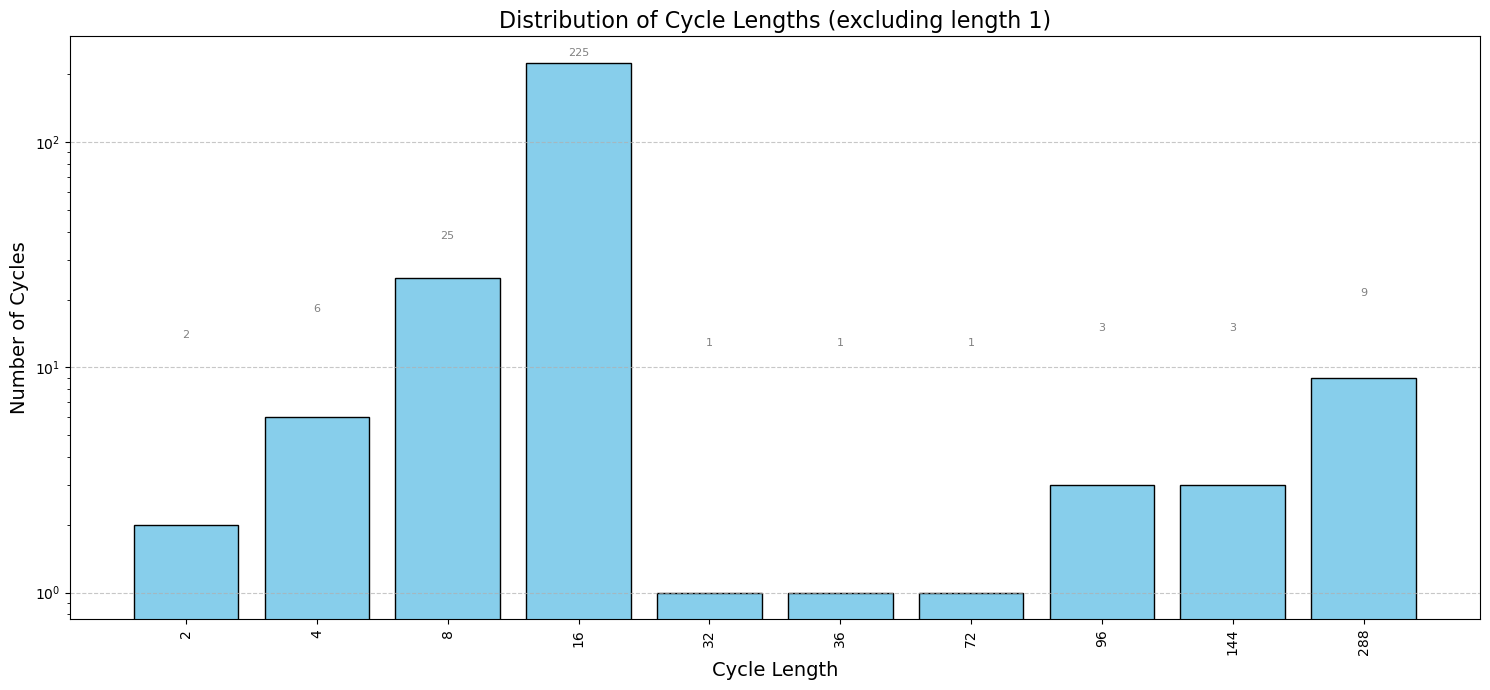

--------------------------------------------------------------------------------
Cycle-generating element -> Cycle length (sorted by length):
--------------------------------------------------------------------------------
[0, 0, 0] -> 1
[16, 0, 0] -> 1
[0, 10, 7] -> 2
[0, 12, 4] -> 2
[0, 2, 5] -> 4
[0, 6, 12] -> 4
[0, 6, 16] -> 4
[0, 10, 8] -> 4
[0, 12, 9] -> 4
[0, 15, 13] -> 4
[0, 0, 1] -> 8
[0, 0, 7] -> 8
[0, 1, 5] -> 8
[0, 1, 6] -> 8
[0, 1, 8] -> 8
[0, 4, 11] -> 8
[0, 5, 12] -> 8
[0, 6, 2] -> 8
[0, 7, 1] -> 8
[0, 7, 5] -> 8
[0, 7, 15] -> 8
[0, 9, 3] -> 8
[0, 10, 2] -> 8
[0, 13, 6] -> 8
[0, 15, 2] -> 8
[0, 16, 1] -> 8
[1, 0, 2] -> 8
[1, 2, 16] -> 8
[1, 3, 14] -> 8
[1, 4, 10] -> 8
[1, 5, 4] -> 8
[1, 7, 1] -> 8
[1, 7, 8] -> 8
[1, 12, 15] -> 8
[1, 13, 9] -> 8
[0, 0, 2] -> 16
[0, 0, 3] -> 16
[0, 0, 4] -> 16
[0, 0, 5] -> 16
[0, 0, 6] -> 16
[0, 0, 8] -> 16
[0, 0, 9] -> 16
[0, 0, 10] -> 16
[0, 0, 13] -> 16
[0, 0, 15] -> 16
[0, 0, 16] -> 16
[0, 1, 2] -> 16
[0, 1, 7] -> 16
[0, 1, 11] -> 16
[

In [1]:
import math
import matplotlib.pyplot as plt
from collections import defaultdict

class M3System:
    def __init__(self, A, B, C, D, E, modulus):
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.E = E
        self.modulus = modulus
        self.identity_element = M3Element(0, 0, 0, self) 

    def __str__(self):
        return f"M3System(A={self.A}, B={self.B}, C={self.C}, D={self.D}, E={self.E}, modulus={self.modulus})"

    def get_identity(self):
        return self.identity_element

    def __eq__(self, other):
        if not isinstance(other, M3Element):
            return NotImplemented
        return (self.x0 == other.x0 and
                self.x1 == other.x1 and
                self.x2 == other.x2 and
                self.system == other.system)

    def __hash__(self):
        return hash((self.x0, self.x1, self.x2, hash(self.system)))


class M3Element:
    def __init__(self, x0, x1, x2, system):
        self.x0 = x0 % system.modulus
        self.x1 = x1 % system.modulus
        self.x2 = x2 % system.modulus
        self.system = system

    def __mul__(self, other):
        if not isinstance(other, M3Element) or self.system != other.system:
            raise ValueError("Can only multiply M3Element with another M3Element from the same system.")

        s = self.system
        new_x0 = (self.x0 + other.x0 + self.x0 * other.x0 +
                  s.A * self.x1 * other.x1 +
                  s.C * self.x2 * other.x1 +
                  s.B * self.x2 * other.x2) % s.modulus

        new_x1 = (self.x1 + other.x1 + self.x1 * other.x0 +
                  self.x0 * other.x1 +
                  s.D * self.x1 * other.x1 +
                  s.E * self.x1 * other.x2) % s.modulus

        new_x2 = (self.x2 + other.x2 + self.x2 * other.x0 +
                  self.x0 * other.x2 +
                  s.D * self.x2 * other.x1 +
                  s.E * self.x2 * other.x2) % s.modulus

        return M3Element(new_x0, new_x1, new_x2, s)

    def __pow__(self, exponent):
        if not isinstance(exponent, int) or exponent < 0:
            raise ValueError("Exponent must be a non-negative integer.")
        if exponent == 0:
            return self.system.get_identity()
        
        result = self.system.get_identity() 
        base = self

        while exponent > 0:
            if exponent % 2 == 1:
                result = result * base
            base = base * base
            exponent //= 2
        return result

    def __eq__(self, other):
        if not isinstance(other, M3Element):
            return NotImplemented
        return (self.x0 == other.x0 and
                self.x1 == other.x1 and
                self.x2 == other.x2 and
                self.system == other.system)

    def __hash__(self):
        return hash((self.x0, self.x1, self.x2, hash(self.system)))

    def __str__(self):
        return f"[{self.x0}, {self.x1}, {self.x2}]"

    def __repr__(self):
        return self.__str__()

    def to_tuple(self):
        return (self.x0, self.x1, self.x2)

# --- Main analysis code ---

def analyze_m3_system_and_plot_cycles(system):
    modulus = system.modulus
    total_space_elements = modulus**3 
    
    generated_cycles = [] # List to store (generator element, cycle length)
    
    global_elements_in_orbits = set() 

    print(f"Analyzing M3-System: {system}")
    print(f"Total unique elements in space: {total_space_elements}\n")

    # --- Handle the Identity Element [0,0,0] ---
    identity_element = system.get_identity()
    identity_tuple = identity_element.to_tuple()
    
    global_elements_in_orbits.add(identity_tuple)
    generated_cycles.append((identity_tuple, 1)) 


    # --- Iterate through all possible elements to find cycle generators ---
    for x0_val in range(modulus):
        for x1_val in range(modulus):
            for x2_val in range(modulus):
                current_seed = M3Element(x0_val, x1_val, x2_val, system)
                current_seed_tuple = current_seed.to_tuple()

                # Skip the identity element, it's already handled
                if current_seed == identity_element:
                    continue

                # If this element has already been part of another found orbit, skip it.
                if current_seed_tuple in global_elements_in_orbits:
                    continue

                # --- Build the orbit for a new generating element ---
                path = []
                path_dict = {} 
                current_in_orbit = current_seed
                cycle_length = 0
                
                while True:
                    current_tuple = current_in_orbit.to_tuple()
                    
                    if current_in_orbit == identity_element:
                        path.append(current_tuple) 
                        cycle_length = len(path)
                        break 

                    if current_tuple in path_dict:
                        cycle_start_index = path_dict[current_tuple]
                        cycle_length = len(path) - cycle_start_index
                        break 
                    
                    path_dict[current_tuple] = len(path)
                    path.append(current_tuple)
                    
                    current_in_orbit = current_in_orbit * current_seed 
                
                # Store the generator and its cycle length
                generated_cycles.append((current_seed_tuple, cycle_length))
                
                # Add all elements from the discovered orbit to the globally visited set
                for p_elem_tuple in path:
                    global_elements_in_orbits.add(p_elem_tuple)

    # --- Bar Chart of Cycle Length Frequencies ---
    # Prepare data: count occurrences of each cycle length
    cycle_length_counts = defaultdict(int)
    for _, length in generated_cycles:
        # Exclude the cycle of length 1 (from [0,0,0]) for clearer visualization
        if length > 1: 
            cycle_length_counts[length] += 1
    
    # Sort unique cycle lengths for consistent plotting order
    sorted_lengths = sorted(cycle_length_counts.keys())
    counts = [cycle_length_counts[length] for length in sorted_lengths]

    if sorted_lengths: # Ensure there's data to plot
        plt.figure(figsize=(15, 7)) # Larger figure for better readability
        
        # Create a bar plot
        bars = plt.bar(range(len(sorted_lengths)), counts, color='skyblue', edgecolor='black')
        
        plt.title('Distribution of Cycle Lengths (excluding length 1)', fontsize=16)
        plt.xlabel('Cycle Length', fontsize=14)
        plt.ylabel('Number of Cycles', fontsize=14)
        
        # Set x-axis ticks to be the actual cycle lengths
        plt.xticks(range(len(sorted_lengths)), sorted_lengths, rotation=90, ha='center', fontsize=10)
        
        # Optional: Add labels on top of bars for exact counts
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * max(counts), 
                     int(yval), ha='center', va='bottom', fontsize=8, color='grey')
        
        plt.yscale('log') # Use logarithmic scale for Y-axis for better visibility of rare lengths
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show() 
    else:
        print("Not enough data to plot cycle length distribution (no cycles longer than 1).")

    # --- Text Output ---
    print("-" * 80)
    print("Cycle-generating element -> Cycle length (sorted by length):")
    print("-" * 80)
    
    # Sort by cycle length (the second item in the tuple)
    # Using lambda for the sort key makes it clean.
    sorted_generated_cycles = sorted(generated_cycles, key=lambda x: x[1])
    for generator, length in sorted_generated_cycles:
        print(f"{list(generator)} -> {length}")

    print("-" * 80)
    print(f"Total unique elements in the entire space: {total_space_elements}")
    print(f"Total unique elements visited across all orbits: {len(global_elements_in_orbits)}")
    print(f"Ratio of elements covered by orbits to total space: {len(global_elements_in_orbits) / total_space_elements:.4f}")
    print("-" * 80)

# --- Run the analysis ---
if __name__ == "__main__":
    my_system = M3System(A=3, B=5, C=7, D=11, E=13, modulus=17) 
    
    analyze_m3_system_and_plot_cycles(my_system)